# Forest Cover Type prediction using Random Forest

In [367]:
import numpy as np
import pandas as pd                # Data exploration, manipulation functions
import matplotlib.pyplot as plt
import seaborn as sns              # Plots
import re                          # Regular Expression

In [368]:
forest_train = pd.read_csv("train.csv")  # Import the train data set

In [369]:
forest_train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [370]:
forest_train.info()                      #No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
Id                                    15120 non-null int64
Elevation                             15120 non-null int64
Aspect                                15120 non-null int64
Slope                                 15120 non-null int64
Horizontal_Distance_To_Hydrology      15120 non-null int64
Vertical_Distance_To_Hydrology        15120 non-null int64
Horizontal_Distance_To_Roadways       15120 non-null int64
Hillshade_9am                         15120 non-null int64
Hillshade_Noon                        15120 non-null int64
Hillshade_3pm                         15120 non-null int64
Horizontal_Distance_To_Fire_Points    15120 non-null int64
Wilderness_Area1                      15120 non-null int64
Wilderness_Area2                      15120 non-null int64
Wilderness_Area3                      15120 non-null int64
Wilderness_Area4                      15120 non-null int64
Soil_T

In [396]:
rtrain,coltrain  = forest_train.shape  #Dimensions of training data set
rtrain

15120

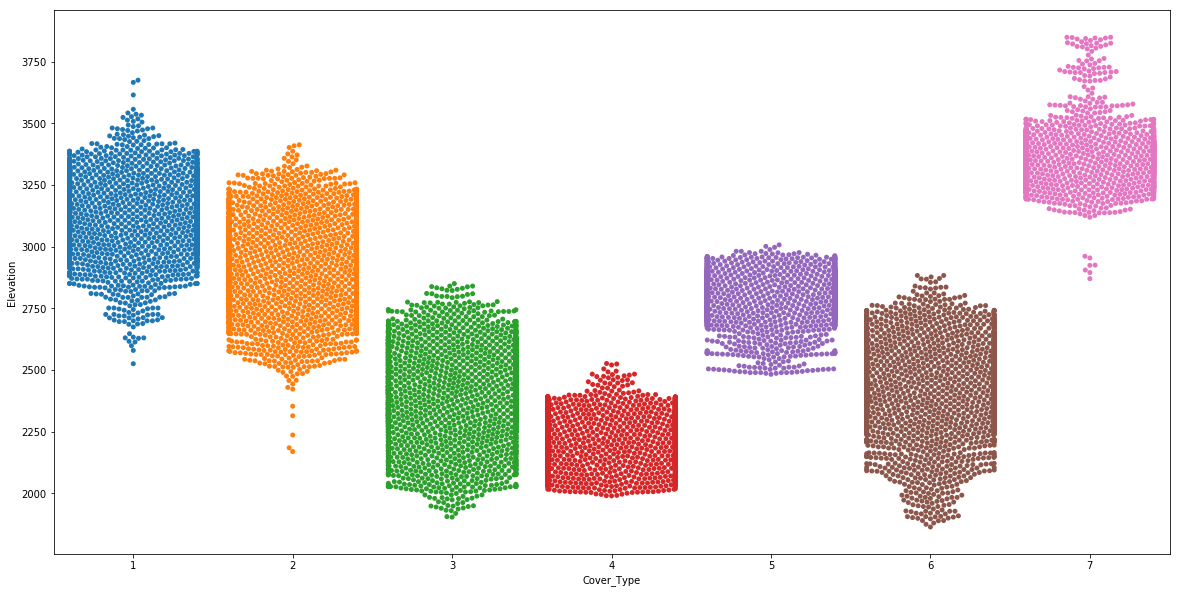

In [372]:
plt.figure(figsize=(20,10))     
sns.swarmplot(x = "Cover_Type", y= "Elevation", data = forest_train)
plt.show()

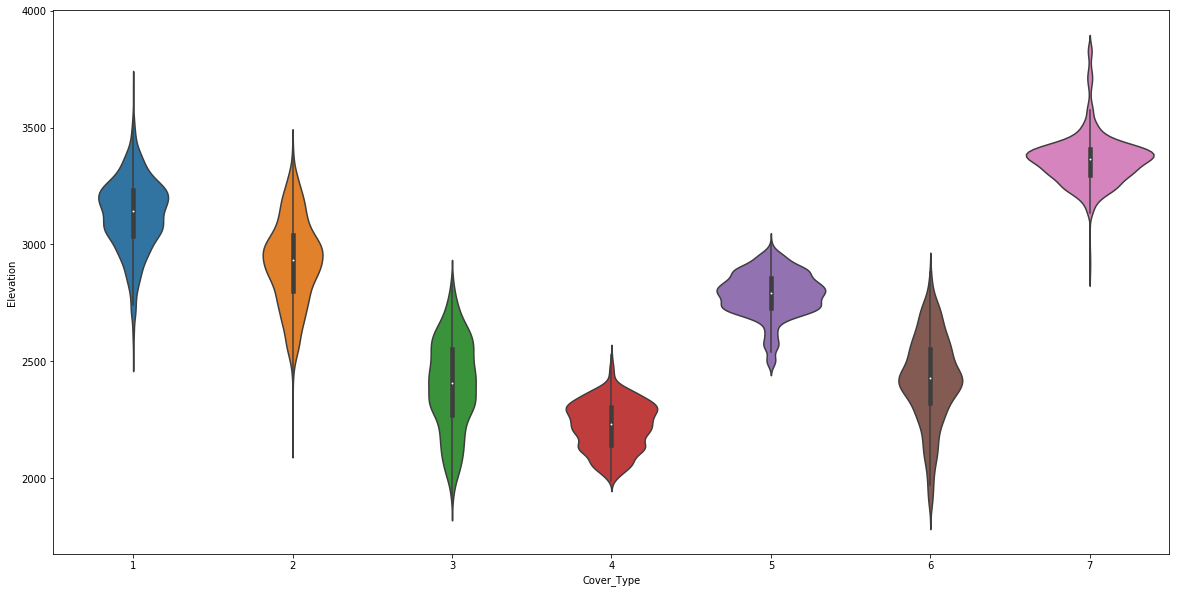

In [373]:
#Violin plots give the density of points along with the distribution
plt.figure(figsize=(20,10))    
sns.violinplot(x = "Cover_Type", y= "Elevation", data = forest_train)
plt.show()
# Forests of Category Type 7 have higher Elevation 

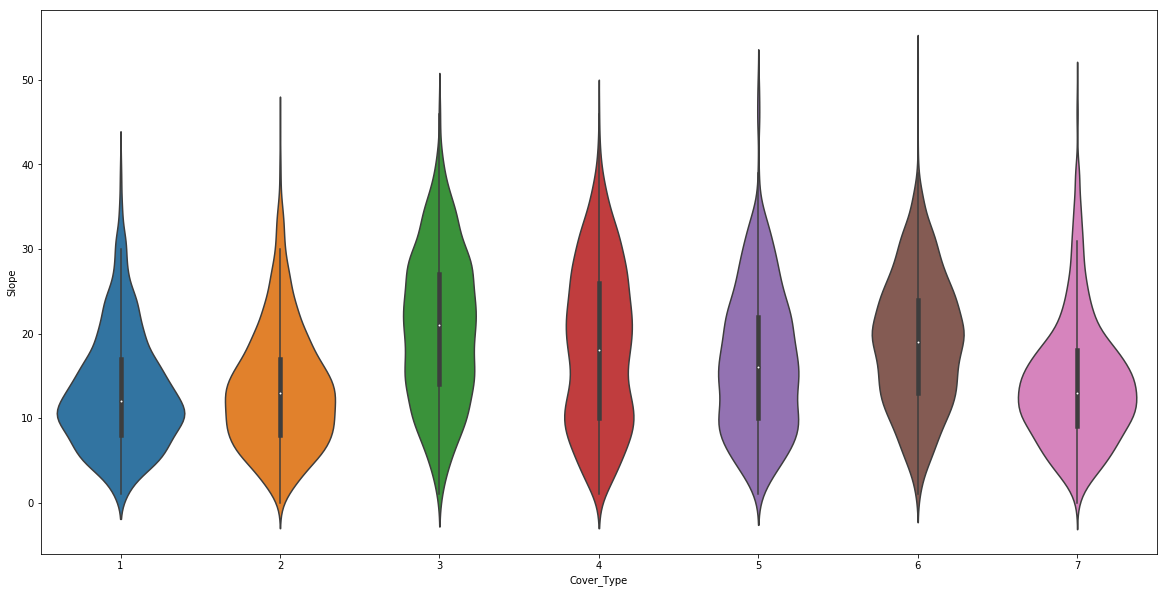

In [374]:
###### Variable = "Slope"
plt.figure(figsize=(20,10))     
sns.violinplot(x = "Cover_Type", y= "Slope", data = forest_train)
plt.show()
# Slope of surface doesnt have too much impact on forest cover type

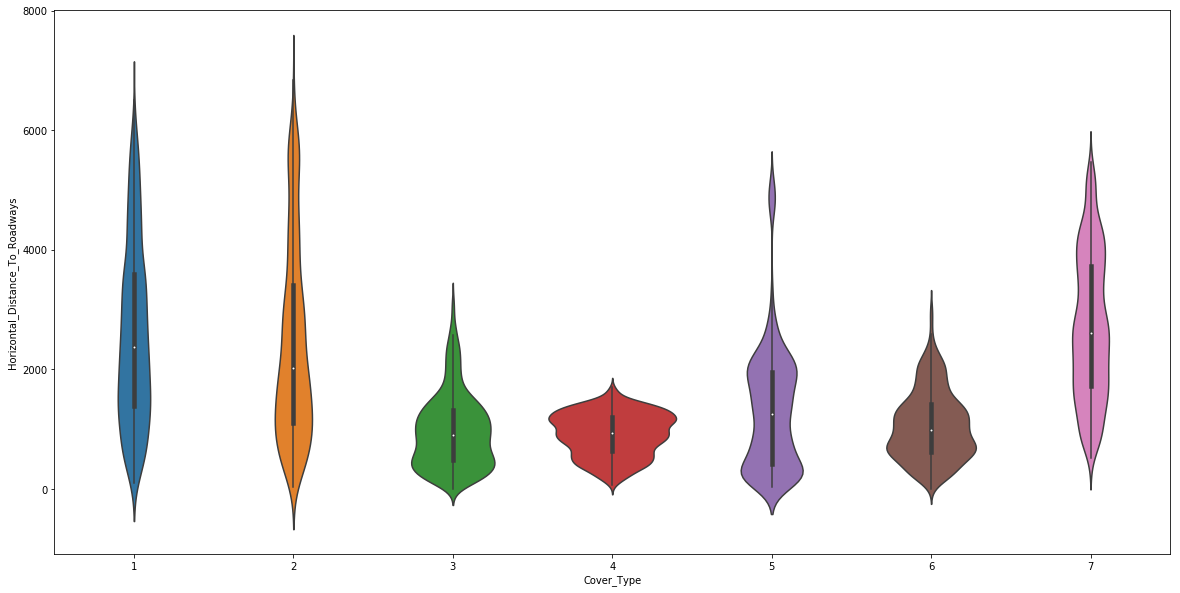

In [14]:
###### Variable = "Horizontal_Distance_To_Roadways"
plt.figure(figsize=(20,10))     
sns.violinplot(x = "Cover_Type", y= "Horizontal_Distance_To_Roadways", data = forest_train)
plt.show()
#Forest Cover types 1,2 and 7 tend to be further away from roadways

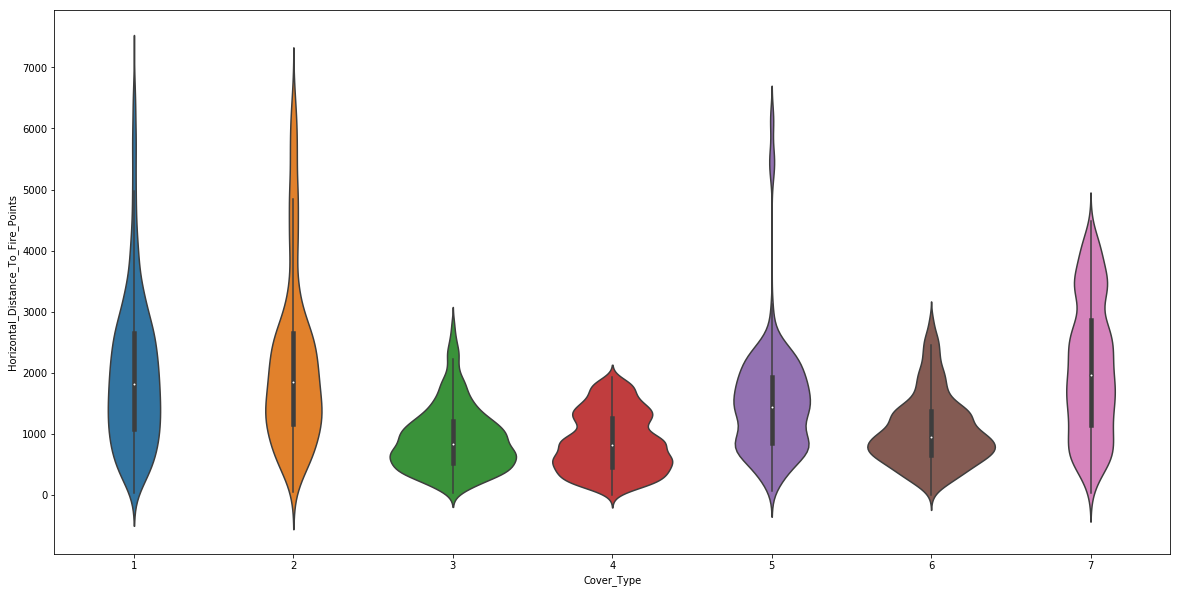

In [375]:
##### Variable = "Horizontal_Distance_To_Fire_Points"
plt.figure(figsize=(20,10))     
sns.violinplot(x = "Cover_Type", y= "Horizontal_Distance_To_Fire_Points", data = forest_train)
plt.show()
#Not too much corelation between Horizontal_Distance_To_Fire_Points and Cover-Type

In [376]:
# Reverse One hot encoding to get the variable name
wild_area = []
r,c = forest_train.shape

for row in range(0,r):
    for col in range(11,15):
        if forest_train.iloc[row,col] == 1:
            wild_area.append(forest_train.columns.values[col])
            


In [377]:
forest_train['Wilderness_Area']=wild_area

In [378]:
forest_train.tail()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Wilderness_Area
15115,15116,2607,243,23,258,7,660,170,251,214,...,0,0,0,0,0,0,0,0,3,Wilderness_Area3
15116,15117,2603,121,19,633,195,618,249,221,91,...,0,0,0,0,0,0,0,0,3,Wilderness_Area3
15117,15118,2492,134,25,365,117,335,250,220,83,...,0,0,0,0,0,0,0,0,3,Wilderness_Area3
15118,15119,2487,167,28,218,101,242,229,237,119,...,0,0,0,0,0,0,0,0,3,Wilderness_Area3
15119,15120,2475,197,34,319,78,270,189,244,164,...,0,0,0,0,0,0,0,0,3,Wilderness_Area3


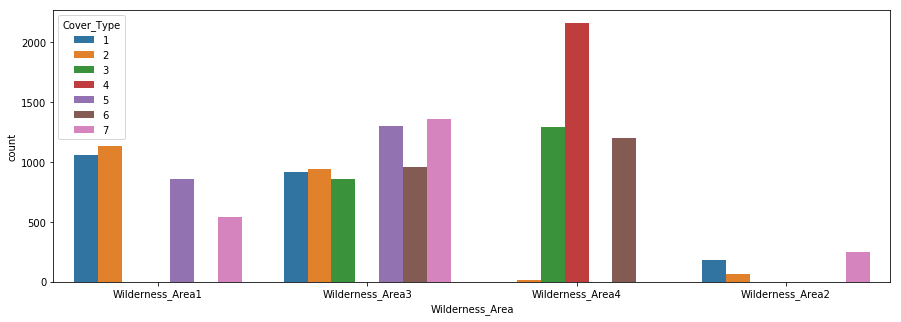

In [379]:
plt.figure(figsize=(15,5))   
sns.countplot(x= "Wilderness_Area", data = forest_train, hue = "Cover_Type")
plt.show()
#Certain wilderness areas have only certain cover types, so Wilderness area is an important variable

In [380]:
covertype_train = forest_train['Cover_Type']
data_train = forest_train.drop(['Id','Cover_Type','Wilderness_Area'],axis = 1)

In [381]:
forest_test = pd.read_csv("test.csv")
data_test = forest_test.drop("Id",axis = 1)

In [397]:
rtest,coltest = forest_test.shape
rtest

565892

## Test set size is 37 times the train set size. So model in this case has less data to learn from

In [398]:
rtest/rtrain

37.42671957671958

In [382]:
from sklearn.ensemble import RandomForestClassifier

#### RF model with default parameters

In [383]:
classifier = RandomForestClassifier(n_estimators=10, criterion="gini", max_features="auto",bootstrap=True,oob_score=True,n_jobs = -1,random_state=42,verbose =1)

In [384]:
classifier.fit(data_train,covertype_train)

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
E:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=True, random_state=42, verbose=1, warm_start=False)

In [385]:
classifier.oob_score_

0.78187830687830684

In [386]:
pred_test = classifier.predict(data_test)  #Kaggle score 0.7218


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.7s finished


In [387]:
forest_test['Cover_Type'] = pred_test
forest_test[['Id','Cover_Type']].to_csv("ForestCover_rf_model.csv",index = False)

#### RF model with 100 trees

In [388]:
classifier = RandomForestClassifier(n_estimators=100, criterion="gini", max_features="auto",bootstrap=True,oob_score=True,n_jobs = -1,random_state=42,verbose =1)

In [389]:

classifier.fit(data_train,covertype_train)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.3s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=42, verbose=1, warm_start=False)

In [390]:
classifier.oob_score_

0.86514550264550261

In [391]:
varimp = pd.DataFrame(data = {"Feature_Importance":classifier.feature_importances_,"Feature_Names":data.columns.values})
varimp.sort_values(by = ['Feature_Importance'],axis = 0,ascending=False,inplace=True)
varimp

,Feature_Importance,Feature_Names
0,0.219278,Elevation
5,0.099552,Horizontal_Distance_To_Roadways
9,0.071933,Horizontal_Distance_To_Fire_Points
3,0.063973,Horizontal_Distance_To_Hydrology
4,0.053190,Vertical_Distance_To_Hydrology
6,0.050045,Hillshade_9am
1,0.049828,Aspect
8,0.045740,Hillshade_3pm
7,0.044603,Hillshade_Noon
13,0.038281,Wilderness_Area4


In [392]:
pred_test = classifier.predict(data_test) # Kaggle score 0.75243

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    7.0s finished


In [393]:
forest_test['Cover_Type'] = pred_test
forest_test[['Id','Cover_Type']].to_csv("ForestCover_rf_model.csv",index = False)

In [175]:
#data_train.drop(['Soil_Type7','Soil_Type15'], axis = 1,inplace=True)

In [176]:
#data_test.drop(['Soil_Type7','Soil_Type15'], axis = 1,inplace=True)

In [177]:
classifier.fit(data_train,covertype_train)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.5s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=42, verbose=1, warm_start=False)

In [178]:
classifier.oob_score_

0.86177248677248675

In [179]:
pred_test = classifier.predict(data_test)  #Kaggle score 0.74994 - went slightly down after dropping 2 soil type categories

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    6.8s finished


In [180]:
forest_test['Cover_Type'] = pred_test
forest_test[['Id','Cover_Type']].to_csv("ForestCover_rf_model.csv",index = False)

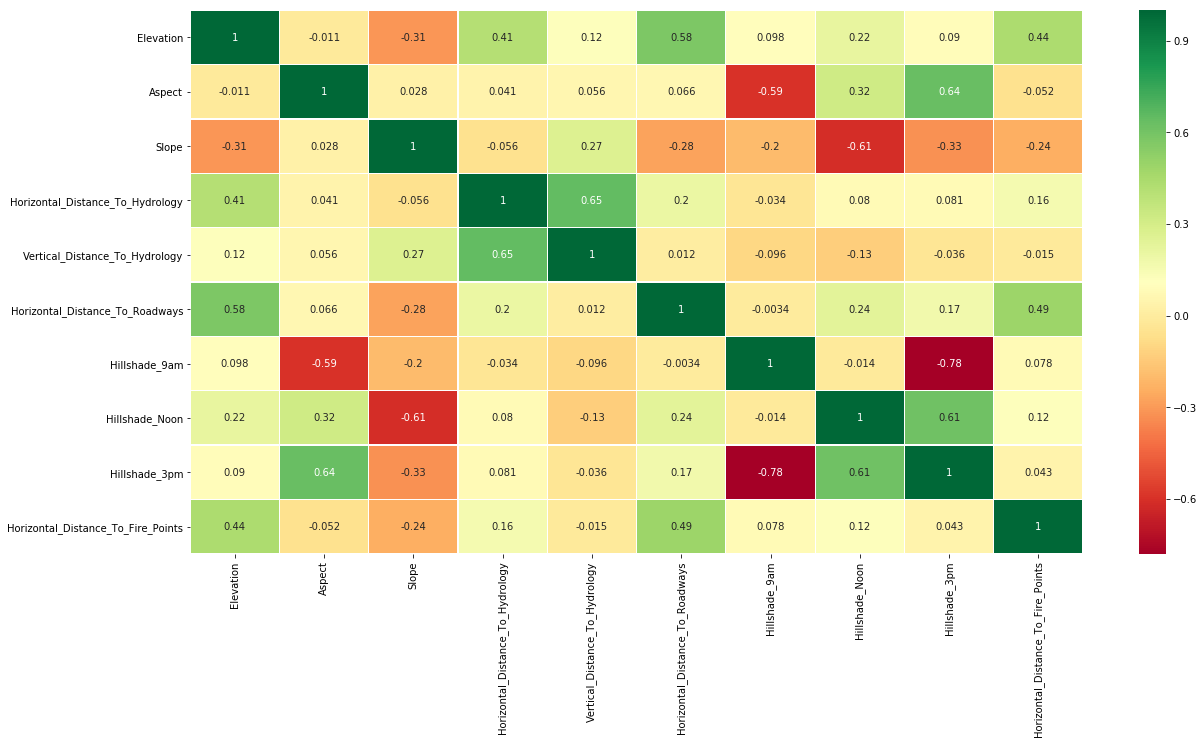

In [335]:
plt.figure(figsize=(20,10))    
sns.heatmap(data_train.iloc[:,0:10].corr(),annot = True,cmap='RdYlGn',linewidths=0.2)
plt.show()
# Some co-relation between Hillshade_9am and Hillshade_3pm, Vertical_distance to hydrolgy and horizontal_distance to hydrology

#### Extra trees classifier 

In [ ]:
### As in random forests, a random subset of candidate features is used, but instead of looking for the most discriminative thresholds, thresholds are drawn at random for each candidate feature and the best of these randomly-generated thresholds is picked as the splitting rule

In [399]:
from sklearn.ensemble import ExtraTreesClassifier

In [400]:
classifierET = ExtraTreesClassifier(n_estimators=100, criterion="gini", max_features="auto",bootstrap=True,oob_score=True,n_jobs = -1,random_state=42,verbose =1)

In [401]:
classifierET.fit(data_train,covertype_train)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.5s finished


ExtraTreesClassifier(bootstrap=True, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=True, random_state=42, verbose=1, warm_start=False)

In [402]:
classifierET.oob_score_

0.85601851851851851

In [403]:
pred_test = classifierET.predict(data_test)  #Kaggle score 0.7380. Slightly decreased

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    7.8s finished


In [404]:
forest_test['Cover_Type'] = pred_test
forest_test[['Id','Cover_Type']].to_csv("ForestCover_rf_model.csv",index = False)

### Hyperparmeter optimization in random forest

#### Optimizing the max_features parameter

In [407]:
max_feat = list(range(1,25))

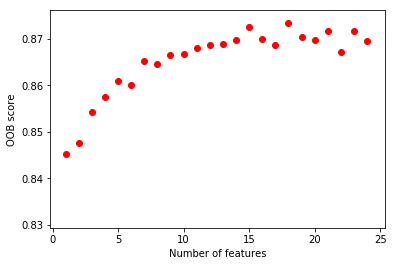

In [408]:
for feat in max_feat:            
    classifier = RandomForestClassifier(n_estimators=100, criterion="gini", max_features=feat,bootstrap=True,oob_score=True,n_jobs = -1,random_state=42)
    classifier.fit(data_train,covertype_train)
    plt.scatter(feat, classifier.oob_score_, color='red')
plt.xlabel("Number of features")
plt.ylabel("OOB score")
plt.show()
#Max features = 18 seems optimal

#### Optimizing the number of trees

In [409]:
nest = list(range(50,120))

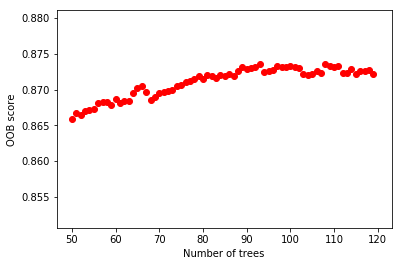

In [410]:
for est in nest:            
    classifier = RandomForestClassifier(n_estimators=est, criterion="gini", max_features=18,bootstrap=True,oob_score=True,n_jobs = -1,random_state=42)
    classifier.fit(data_train,covertype_train)
    plt.scatter(est, classifier.oob_score_, color='red')
plt.xlabel("Number of trees")
plt.ylabel("OOB score")
plt.show()
#Max trees = 110 trees look optimal

#### Optimizing the min_samples_leaf parameter

In [405]:
min_samples_leaf = [1,2,3,4,5]

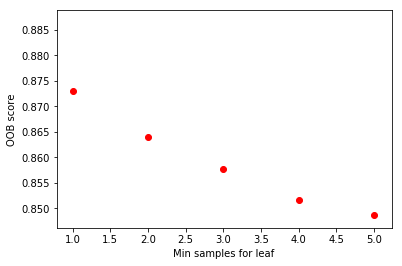

In [412]:
for leaf in min_samples_leaf:            
    classifier = RandomForestClassifier(n_estimators=110, criterion="gini", max_features=18,bootstrap=True,oob_score=True,n_jobs = -1, min_samples_leaf= leaf,random_state=42)
    classifier.fit(data_train,covertype_train)
    plt.scatter(leaf, classifier.oob_score_, color='red')
plt.xlabel("Min samples for leaf")
plt.ylabel("OOB score")
plt.show()
## OOB accuracy decreases as min_samples_leaf increases. Fully formed trees work better

#### Optimizing the max_depth parameter 

In [413]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = [{'max_depth':[20,30,40,50]}]

In [ ]:
grid_search = GridSearchCV(estimator = classifier_final,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1,
                           verbose =1)

In [324]:
grid_search.fit(data_train, covertype_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  3.6min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=18, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=110, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'max_depth': [20, 30, 40, 50]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [325]:
grid_search.best_params_

{'max_depth': 30}

In [327]:
grid_search.grid_scores_
# max_depth 30 gives best CV accuracy

E:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.78710, std: 0.04188, params: {'max_depth': 20},
 mean: 0.79067, std: 0.04103, params: {'max_depth': 30},
 mean: 0.78909, std: 0.04306, params: {'max_depth': 40},
 mean: 0.78730, std: 0.04399, params: {'max_depth': 50}]

### Best paramters for model: 
#### Trees = 110, max features = 18, maxdepth = 30, min samples leaf = 1

### Final Model

In [414]:
classifier_final = RandomForestClassifier(n_estimators=110, criterion="gini", max_features=18,bootstrap=True,oob_score=True,n_jobs = -1,max_depth=30,random_state=42)
classifier_final.fit(data_train,covertype_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features=18, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=110, n_jobs=-1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

In [415]:
classifier_final.oob_score_

0.87308201058201063

In [416]:
pred_test = classifier_final.predict(data_test) #Kaggle score 0.7558

In [417]:
forest_test['Cover_Type'] = pred_test
forest_test[['Id','Cover_Type']].to_csv("ForestCover_rf_model.csv",index = False)

In [351]:
class_weights = pd.DataFrame({"Class_count":forest_test['Cover_Type'].groupby(forest_test['Cover_Type']).agg(len)})
class_weights

,Class_count
Cover_Type,
1,209859
2,227187
3,36335
4,2419
5,32418
6,25539
7,32135


In [418]:
forest_train['Cover_Type'].groupby(forest_train['Cover_Type']).agg(len)
## In train data set all cover types have equal samples unlike test

Cover_Type
1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
Name: Cover_Type, dtype: int64

In [419]:
class_weights['Class_Weights'] = class_weights['Class_count']/sum(class_weights['Class_count'])
class_weights

,Class_count,Class_Weights
Cover_Type,,
1,209859,0.370846
2,227187,0.401467
3,36335,0.064208
4,2419,0.004275
5,32418,0.057287
6,25539,0.045131
7,32135,0.056786


In [358]:
# Function to assign weights to the samples
def ret_weight(type):
    if type == 1:
        return 0.37
    elif type == 2:
        return 0.4
    elif type == 3:
        return 0.06
    elif type == 4:
        return 0.004
    elif type == 5:
        return 0.057
    elif type == 6:
        return 0.045
    else :
        return 0.056

In [420]:
sample_weights = forest_train['Cover_Type'].apply(ret_weight)

In [421]:
forest_train['Sample_weights'] = sample_weights

In [422]:
forest_train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Wilderness_Area,Sample_weights
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,5,Wilderness_Area1,0.057
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,5,Wilderness_Area1,0.057
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,2,Wilderness_Area1,0.400
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,2,Wilderness_Area1,0.400
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,5,Wilderness_Area1,0.057


In [363]:
classifier_final.fit(data_train,covertype_train,sample_weight=sample_weights) 


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features=18, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=110, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [364]:
classifier_final.oob_score_

0.8662037037037037

In [365]:
pred_test = classifier_final.predict(data_test) # Kaggle score 0.7443

In [366]:
forest_test['Cover_Type'] = pred_test
forest_test[['Id','Cover_Type']].to_csv("ForestCover_rf_model.csv",index = False)

## Inferences

### More number of trees in Random forest give more accuracy but after a certain limit, the accuracy stays     constant 

### Random forest is also sensitive to the max_features parameter. Changing it can change the accuracy of the model

### Optimal value of hyperparameter can be found by iteratively searching through a range of values